In [3]:
!pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=300d98613a972fd0635b20c4d2861565dd244288b08d699815ef2dccb7bc8ed4
  Stored in directory: c:\users\rydhm\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [69]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.graph_objects as go
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter
from bokeh.plotting import figure, output_notebook, show 



In [103]:
df = pd.read_csv("covid_19_india.csv",sep="\t")
a1 = pd.read_csv("HospitalBedsIndia.csv",sep='\t')
df2 = pd.read_csv("population_india_census2011.csv",encoding='windows-1252' ,sep=",")
df3 = pd.read_csv("StatewiseTestingDetails.csv")

In [104]:
a1.head()

,Sno\tState\tNumPrimaryHealthCenters_HMIS\tNumCommunityHealthCenters_HMIS\tNumSubDistrictHospitals_HMIS\tNumDistrictHospitals_HMIS\tTotalPublicHealthFacilities_HMIS\tNumPublicBeds_HMIS\tNumRuralHospitals_NHP18\tNumRuralBeds_NHP18\tNumUrbanHospitals_NHP18\tNumUrbanBeds_NHP18
0,1\tAndaman & Nicobar Islands\t27\t4\t\t3\t34\t...
1,2\tAndhra Pradesh\t1417\t198\t31\t20\t1666\t60...
2,3\tArunachal Pradesh\t122\t62\t\t15\t199\t2320...
3,4\tAssam\t1007\t166\t14\t33\t1220\t19115\t1176...
4,5\tBihar\t2007\t63\t33\t43\t2146\t17796\t930\t...


In [72]:
df2.head()

,Sno,State,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


In [73]:
df3.head()

,Date,State,TotalSamples,Negative,Positive
0,17-04-2020,Andaman and Nicobar Islands,1403,1210,12.0
1,24-04-2020,Andaman and Nicobar Islands,2679,NaN,27.0
2,27-04-2020,Andaman and Nicobar Islands,2848,NaN,33.0
3,01-05-2020,Andaman and Nicobar Islands,3754,NaN,33.0
4,16-05-2020,Andaman and Nicobar Islands,6677,NaN,33.0


In [80]:
df['Date']=pd.to_datetime(df['Date'])
df3['Date']=pd.to_datetime(df3['Date'])



In [81]:
date_str1 = '2020-06-1'
date_str2="2020-06-30"
frame = df[df.Date >date_str1 ]


In [82]:
len(frame)

1714

In [83]:
frame.head()

,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
7,8,2020-06-02,6:00 PM,Kerala,3,0,0,0,3
8,9,2020-07-02,6:00 PM,Kerala,3,0,0,0,3
9,10,2020-08-02,6:00 PM,Kerala,3,0,0,0,3
10,11,2020-09-02,6:00 PM,Kerala,3,0,0,0,3
11,12,2020-10-02,6:00 PM,Kerala,3,0,0,0,3


In [84]:
frame=frame[frame.Date<=date_str2]

In [89]:
len(frame)

790

In [90]:
frame=frame[frame.State=="Maharashtra"]


In [91]:
len(frame)

22

In [92]:
frame.head()

,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
678,679,2020-06-04,6:00 PM,Andhra Pradesh,-,-,1,3,226
1639,1640,2020-06-05,8:00 AM,Andhra Pradesh,-,-,589,36,1717
2703,2704,2020-06-06,8:00 AM,Andhra Pradesh,-,-,2576,73,4303
2956,2957,2020-06-13,8:00 AM,Andhra Pradesh,-,-,3105,80,5680
2992,2993,2020-06-14,8:00 AM,Andhra Pradesh,-,-,3195,82,5965


In [93]:
framet = df3[df3.Date >date_str1 ]

In [105]:
len(framet)

21

In [97]:
framet = framet[framet.Date <=date_str2 ]

In [98]:
len(framet)

712

In [100]:
framet=framet[framet.State=="Andhra Pradesh"]

In [101]:
len(framet)

21

In [102]:
df_hosp=df1[df1['State']=="Andhra Pradesh"]


KeyError: 'State'


# drop unwanted columns

In [3]:
#df_filtered.shape
df_filtered=df_filtered.drop(["Sno","Time","ConfirmedIndianNational","ConfirmedForeignNational"], axis=1)
#df_filtered=df_filtered.rename(columns={"State/UnionTerritory":"State"})
df_hosp=df_hosp.drop(["Sno","NumPrimaryHealthCenters_HMIS","NumCommunityHealthCenters_HMIS","NumSubDistrictHospitals_HMIS",
                     "NumDistrictHospitals_HMIS","NumRuralHospitals_NHP18","NumRuralBeds_NHP18","NumUrbanHospitals_NHP18",
                     "NumUrbanBeds_NHP18"], axis=1)
df_hosp=df_hosp.rename(columns={"State/UT":"State","TotalPublicHealthFacilities_HMIS":"Hospitals","NumPublicBeds_HMIS":"Beds"})
df_pop=df_pop.drop(["Sno","Rural population","Urban population","Area","Density","Gender Ratio"], axis=1)
df_pop=df_pop.rename(columns={"State / Union Territory":"State"})
#df_filtered.pct_change()
#df_filtered

In [4]:
#join_clmn=df_testing["TotalSamples"]
#df_filtered['TotTests'] = join_clmn.values
#feature_file_df['RESULT'] = join_clmn.to_numpy()
#df_filtered = df_filtered.join(join_clmn)
#df_filtered
#df_testing
df_filtered=pd.merge(df_filtered, df_testing, how='left' ,on=["Date", "Date"])
df_filtered=pd.merge(df_filtered,df_hosp,how='left', on=["State","State"])
df_filtered=pd.merge(df_filtered,df_pop,how='left', on=["State","State"])
#df_filtered
df_filtered=df_filtered.drop(["State"], axis=1)
df_filtered=df_filtered.rename(columns={"State/UnionTerritory":"State","TotalSamples":"TotalTests"})
#df_filtered


In [5]:
Act=df_filtered['Confirmed']-df_filtered['Cured']
#df_filtered['Active']
df_filtered=df_filtered.assign(Active = Act)
df_filtered.head()

,Date,State,Cured,Deaths,Confirmed,TotalTests,Negative,Positive,Hospitals,Beds,Population,Active
0,2020-06-01,Maharashtra,29329,2286,67655,472344.0,399419,67655.0,3239.0,68998.0,112374333.0,38326
1,2020-06-02,Maharashtra,30108,2362,70013,484784.0,409178,70013.0,3239.0,68998.0,112374333.0,39905
2,2020-06-03,Maharashtra,31333,2465,72300,498577.0,420644,72300.0,3239.0,68998.0,112374333.0,40967
3,2020-06-04,Maharashtra,32329,2587,74860,511136.0,430100,74860.0,3239.0,68998.0,112374333.0,42531
4,2020-06-05,Maharashtra,33681,2710,77793,524002.0,440445,77793.0,3239.0,68998.0,112374333.0,44112


No handles with labels found to put in legend.


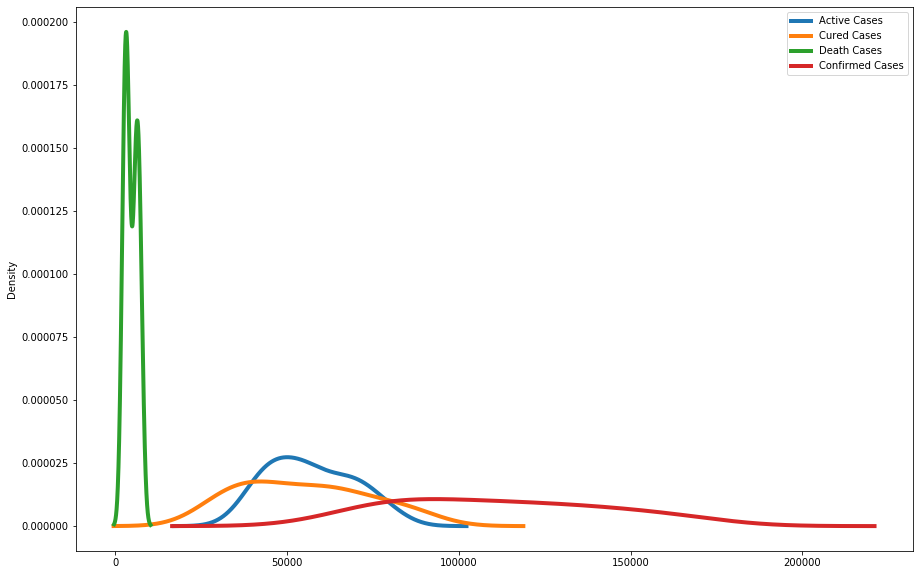

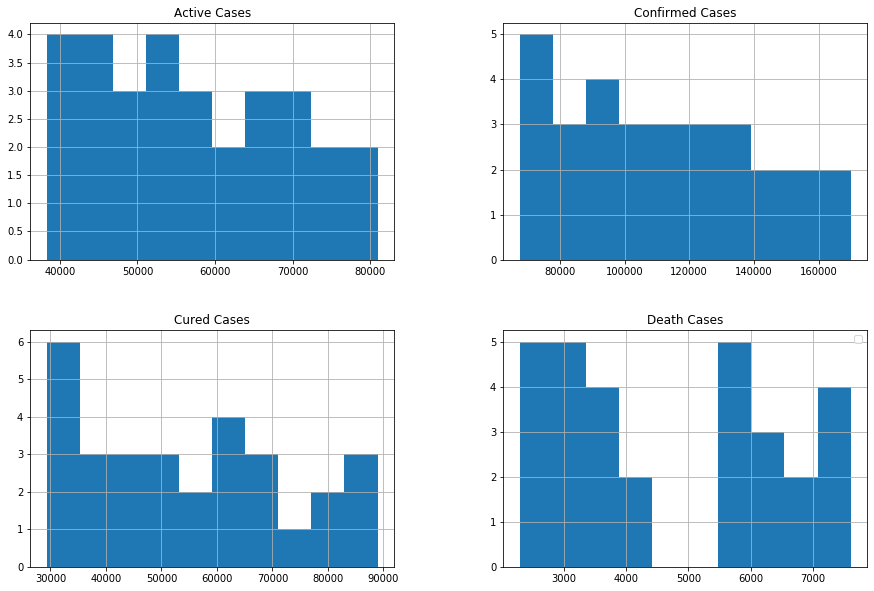

In [6]:
#df_filtered.pct_change(axis='columns')
#print(df_filtered)
from matplotlib import pyplot
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 10
dft = pd.DataFrame(df_filtered, columns= ['Date', 'Cured','Deaths','Active','Confirmed'])
#dft
dft = dft.values.tolist()
#print (dft)
active=[]
Cured=[]
Deaths=[]
Date=[]
Cnfmed=[]

#dt=reader(df_filtered)
#dffiltered=list(dt)
for i in range(len(dft)):
        active.append(dft[i][3])
        Cured.append(dft[i][1])
        Deaths.append(dft[i][2])
        Cnfmed.append(dft[i][4])
        tt=dft[i][0]
        dft[i][0]=tt.strftime('%d-%m-%Y')
        Date.append(dft[i][0])
        
        #print(tt)
df = pd.DataFrame({'Active Cases':active,'Cured Cases':Cured,'Death Cases':Deaths,'Confirmed Cases':Cnfmed},index=Date)
       
df
#df = pd.DataFrame({'Confirmed':[df_filtered['Confirmed']],'Cured':[df_filtered['Cured']],'Deaths':[df_filtered['Deaths']]},
#                  index=[df_filtered['Date']])
 
  
# show plot 
#plt.show() 
#df.pct_change()
avg_1 = df_filtered["Active"].astype("float").mean(axis = 0)
df_filtered["Active"]=df_filtered["Active"].replace(np.nan, avg_1)
avg_2 = df_filtered["Beds"].astype("float").mean(axis = 0)
df_filtered["Beds"]=df_filtered["Beds"].replace(np.nan, avg_1)
#df = df.groupby(df.columns, axis = 1).transform(lambda x: x.fillna(x.mean()))
df.plot(kind='kde',linewidth=4)

df.hist() 
#df.plot.box()
plt.legend()

pyplot.show()

Finding Missing Data

In [7]:
md = df_filtered.isnull()
#md
md_hosp= df_hosp.isnull()
#md_hosp
md_test=df_testing.isnull()
#md_test

Count missing values in each column

Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value, "False" means the value is present in the dataset. In the body of the for loop the method ".value_couts()" counts the number of "True" values.


In [ ]:
for column in md.columns.values.tolist():
    print(column)
    print (md[column].value_counts())
    print("") 

In [ ]:
print(df_filtered.head())
df_filtered.dtypes

# Ploting using Matplotlib

In [ ]:


plt.rcParams["figure.figsize"] = fig_size
plt.plot(df_filtered.Date,df_filtered.Confirmed)
plt.title("COVID-19 Maharashtra")
plt.xticks(rotation=60)
plt.xlabel("Date",labelpad=10)
plt.ylabel("Number of Death Cases",labelpad=10)
plt.show()

In [ ]:
plt.plot(df_filtered.Date,df_filtered.Deaths,color="red")
plt.title("COVID-19 Maharashtra")
plt.xticks(rotation=60)
plt.xlabel("Date",labelpad=20)
plt.ylabel("Number of Deaths Cases",labelpad=10)
plt.show()

In [ ]:
plt.plot(df_filtered.Date,df_filtered.Cured,color="green")
plt.title("COVID-19 Maharashtra Analysis")
plt.xticks(rotation=60)
plt.xlabel("Date",labelpad=10)
plt.ylabel("Number of Recovered Cases",labelpad=10)
plt.show()

Exploring  Multiple plots in One Graph

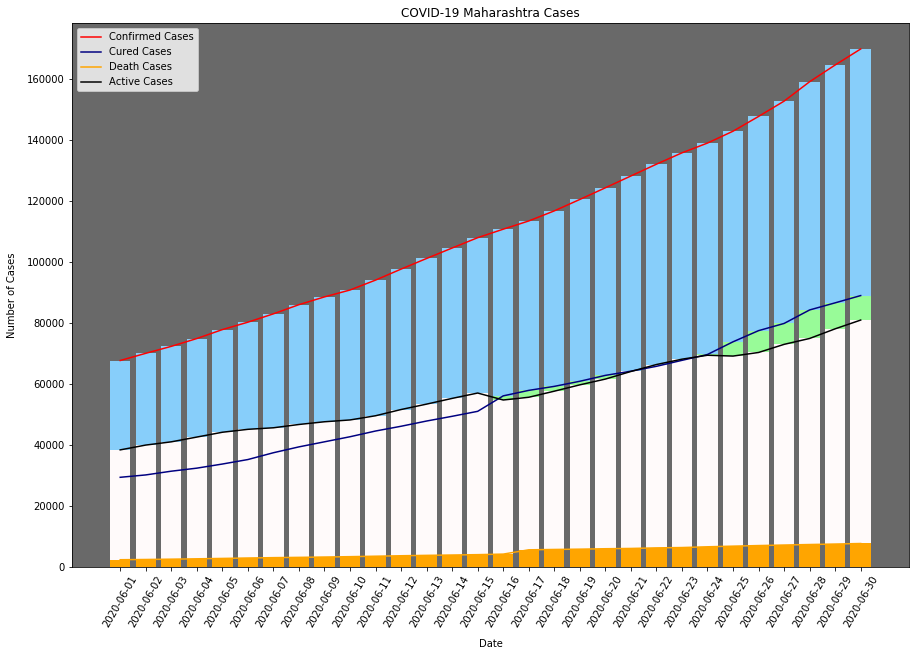

In [8]:
from matplotlib import pyplot as plt
ax = plt.axes()
ax.set_facecolor("dimgrey")

#plt.plot(df_filtered.Date,df_hosp.Beds,color="grey",label='Total Samples')
plt.plot(df_filtered.Date,df_filtered.Confirmed,color="red",label='Confirmed Cases')
plt.plot(df_filtered.Date,df_filtered.Cured,color="navy",label='Cured Cases')
plt.plot(df_filtered.Date,df_filtered.Deaths,color="orange",label='Death Cases')
plt.plot(df_filtered.Date,df_filtered.Active,color="black",label='Active Cases')
plt.legend()
#plt.bar(df_filtered.Date,df_hosp.Beds,color="grey",label='Total Samples')
plt.bar(df_filtered.Date,df_filtered.Confirmed,label='Confirmed Cases',color='lightskyblue')
plt.bar(df_filtered.Date,df_filtered.Cured,color="palegreen",label='Cured Cases')
plt.bar(df_filtered.Date,df_filtered.Active,color="snow",label='Active Cases')
plt.bar(df_filtered.Date,df_filtered.Deaths,color="orange",label='Death Cases')
plt.title("COVID-19 MAHARASHTRA ANALYSIS: JUNE 2020")
plt.xticks(df_filtered.Date,rotation=60)
plt.xlabel("Date",labelpad=10)
plt.ylabel("Number of Cases",labelpad=10)

plt.show()

# Exploring plotly lib
imported plotly library using "pip install plotly"

In [17]:


fig = go.Figure()
fig.add_trace(go.Scatter(x=df_filtered.Date, y=df_filtered.Active,
                    mode='lines',
                    name='Active Cases'))
fig.add_trace(go.Scatter(x=df_filtered.Date, y=df_filtered.Deaths,
                    mode='lines+markers',
                    name='Death Cases'))
fig.add_trace(go.Scatter(x=df_filtered.Date, y=df_filtered.Cured,
                    mode='lines+markers', name='Cured Cases'))
fig.add_trace(go.Scatter(x=df_filtered.Date, y=df_filtered.Beds,
                    mode='lines+markers', name='Beds Available'))
fig.update_layout(title_text='COVID-19 Maharashtra Analysis:JUNE 2020', title_x=0.5)

fig.show()

In [18]:
import plotly.express as px
fig = px.bar(dft, x=0, y=3, color=2,
                 title="Daywise Total Tests Comparision with Deaths",
                 labels={"Deaths":"Confirmed Cases"} # customize axis label
                )

fig.show()

# Exploring Bokeh

In [24]:
output_notebook() 
  
# create figure 
p = figure(plot_width = 800, plot_height = 600) 
  
# add a circle renderer with 
# size, color and alpha 
p.circle(df_filtered.Date, df_filtered.Active,  
         size = 10, color = "green", alpha = 0.5,legend_label='Active Cases') 
p.circle(df_filtered.Date, df_filtered.Cured,  
         size = 10, color = "blue", alpha = 0.5,legend_label='Cured Cases') 
p.circle(df_filtered.Date, df_filtered.Deaths,  
         size = 10, color = "red", alpha = 0.5,legend_label='Deaths Cases') 
p.circle(df_filtered.Date, df_filtered.Beds,  
         size = 10, color = "purple", alpha = 0.5,legend_label='Beds Cases') 
  
# show the results 
show(p)  

Loading BokehJS ...